In [1]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 50)

In [8]:
df_pop = pd.read_csv('../../data/interim/POPULATION_ESTIMATES_2013_to_2019.csv')
df_venues  = pd.read_csv('../../data/interim/CRYTO_VENUES_USA.csv')

In [10]:
df_pop.head(1)

,state,county,CENSUS_2010_POP,POP_ESTIMATE_2013,POP_ESTIMATE_2014,POP_ESTIMATE_2015,POP_ESTIMATE_2016,POP_ESTIMATE_2017,POP_ESTIMATE_2018,POP_ESTIMATE_2019,N_POP_CHG_2013,N_POP_CHG_2014,N_POP_CHG_2015,N_POP_CHG_2016,N_POP_CHG_2017,N_POP_CHG_2018,N_POP_CHG_2019,Births_2013,Births_2014,Births_2015,Births_2016,Births_2017,Births_2018,Births_2019,Deaths_2013,...,R_NATURAL_INC_2016,R_NATURAL_INC_2017,R_NATURAL_INC_2018,R_NATURAL_INC_2019,R_INTERNATIONAL_MIG_2013,R_INTERNATIONAL_MIG_2014,R_INTERNATIONAL_MIG_2015,R_INTERNATIONAL_MIG_2016,R_INTERNATIONAL_MIG_2017,R_INTERNATIONAL_MIG_2018,R_INTERNATIONAL_MIG_2019,R_DOMESTIC_MIG_2013,R_DOMESTIC_MIG_2014,R_DOMESTIC_MIG_2015,R_DOMESTIC_MIG_2016,R_DOMESTIC_MIG_2017,R_DOMESTIC_MIG_2018,R_DOMESTIC_MIG_2019,R_NET_MIG_2013,R_NET_MIG_2014,R_NET_MIG_2015,R_NET_MIG_2016,R_NET_MIG_2017,R_NET_MIG_2018,R_NET_MIG_2019
0,Alabama,Autauga,54571.0,54727.0,54893.0,54864.0,55243.0,55390.0,55533.0,55869.0,-227.0,166.0,-29.0,379.0,147.0,143.0,336.0,571.0,640.0,651.0,666.0,676.0,631.0,624.0,582.0,...,2.161534,1.862012,2.037449,1.490099,0.218816,0.127714,0.236887,-0.054492,-0.216933,-0.126214,-0.287248,-4.121042,1.842729,-1.949762,4.831664,1.06659,0.667129,4.84731,-3.902226,1.970443,-1.712875,4.777171,0.849656,0.540916,4.560062


In [45]:
df_venue_by_county = df_venues.groupby(by=['state','county']).size().reset_index(name='num_venues')

df_pop_venue = pop.merge(df_venue_by_county, on=['state','county'], how='left')
df_pop_venue = df_pop_venue.fillna(0)

In [46]:
df_pop_venue.head(10)

,state,county,CENSUS_2010_POP,POP_ESTIMATE_2013,POP_ESTIMATE_2014,POP_ESTIMATE_2015,POP_ESTIMATE_2016,POP_ESTIMATE_2017,POP_ESTIMATE_2018,POP_ESTIMATE_2019,N_POP_CHG_2013,N_POP_CHG_2014,N_POP_CHG_2015,N_POP_CHG_2016,N_POP_CHG_2017,N_POP_CHG_2018,N_POP_CHG_2019,Births_2013,Births_2014,Births_2015,Births_2016,Births_2017,Births_2018,Births_2019,Deaths_2013,...,R_NATURAL_INC_2017,R_NATURAL_INC_2018,R_NATURAL_INC_2019,R_INTERNATIONAL_MIG_2013,R_INTERNATIONAL_MIG_2014,R_INTERNATIONAL_MIG_2015,R_INTERNATIONAL_MIG_2016,R_INTERNATIONAL_MIG_2017,R_INTERNATIONAL_MIG_2018,R_INTERNATIONAL_MIG_2019,R_DOMESTIC_MIG_2013,R_DOMESTIC_MIG_2014,R_DOMESTIC_MIG_2015,R_DOMESTIC_MIG_2016,R_DOMESTIC_MIG_2017,R_DOMESTIC_MIG_2018,R_DOMESTIC_MIG_2019,R_NET_MIG_2013,R_NET_MIG_2014,R_NET_MIG_2015,R_NET_MIG_2016,R_NET_MIG_2017,R_NET_MIG_2018,R_NET_MIG_2019,num_venues
0,Alabama,Autauga,54571.0,54727.0,54893.0,54864.0,55243.0,55390.0,55533.0,55869.0,-227.0,166.0,-29.0,379.0,147.0,143.0,336.0,571.0,640.0,651.0,666.0,676.0,631.0,624.0,582.0,...,1.862012,2.037449,1.490099,0.218816,0.127714,0.236887,-0.054492,-0.216933,-0.126214,-0.287248,-4.121042,1.842729,-1.949762,4.831664,1.066590,0.667129,4.847310,-3.902226,1.970443,-1.712875,4.777171,0.849656,0.540916,4.560062,2.0
1,Alabama,Baldwin,182265.0,194885.0,199183.0,202939.0,207601.0,212521.0,217855.0,223234.0,4740.0,4298.0,3756.0,4662.0,4920.0,5334.0,5379.0,2160.0,2212.0,2257.0,2300.0,2300.0,2310.0,2304.0,1900.0,...,0.956865,-0.009294,-0.099753,1.059658,0.573505,0.651544,0.876894,0.409405,0.450769,0.362739,21.691816,19.610829,17.074420,20.402397,21.988851,24.276447,24.017829,22.751474,20.184334,17.725964,21.279291,22.398256,24.727215,24.380567,3.0
2,Alabama,Barbour,27457.0,26937.0,26755.0,26283.0,25806.0,25157.0,24872.0,24686.0,-232.0,-182.0,-472.0,-477.0,-649.0,-285.0,-186.0,282.0,264.0,271.0,276.0,280.0,263.0,256.0,295.0,...,-0.588662,-2.638470,-2.259978,-0.369645,0.148998,0.490215,0.652729,0.470930,0.479722,0.524638,-7.762540,-5.289429,-16.214789,-18.890745,-25.469458,-9.234644,-5.690302,-8.132185,-5.140431,-15.724575,-18.238016,-24.998528,-8.754922,-5.165664,0.0
3,Alabama,Bibb,22915.0,22521.0,22553.0,22566.0,22586.0,22550.0,22367.0,22394.0,-146.0,32.0,13.0,20.0,-36.0,-183.0,27.0,258.0,253.0,251.0,276.0,291.0,232.0,240.0,275.0,...,1.728111,-1.380324,-0.536181,0.885191,0.621201,0.576254,0.620128,0.443105,0.445266,0.446818,-6.683190,0.709944,0.753563,-1.328845,-3.677774,-7.302358,1.385134,-5.797999,1.331144,1.329817,-0.708717,-3.234669,-6.857092,1.831952,0.0
4,Alabama,Blount,57322.0,57619.0,57526.0,57526.0,57494.0,57787.0,57771.0,57826.0,39.0,-93.0,0.0,-32.0,293.0,-16.0,55.0,647.0,619.0,716.0,700.0,660.0,679.0,651.0,583.0,...,-1.058284,-0.155766,-0.103809,0.781257,0.694776,0.225985,0.382542,-0.017349,0.086537,0.103809,-1.128482,-2.744366,-1.564510,-1.773605,6.210911,-0.155766,1.020788,-0.347225,-2.049590,-1.338525,-1.391062,6.193562,-0.069229,1.124597,0.0
5,Alabama,Bullock,10914.0,10549.0,10663.0,10400.0,10389.0,10176.0,10174.0,10101.0,-57.0,114.0,-263.0,-11.0,-213.0,-2.0,-73.0,130.0,124.0,125.0,143.0,136.0,104.0,109.0,120.0,...,-0.778021,1.179361,0.000000,1.701725,0.565718,0.000000,0.769638,0.778021,1.277641,-0.098644,-8.035925,9.051480,-24.592888,-2.982346,-20.714807,-2.751843,-7.102343,-6.334200,9.617198,-24.592888,-2.212709,-19.936786,-1.474201,-7.200986,0.0
6,Alabama,Butler,20947.0,20356.0,20327.0,20162.0,20012.0,19888.0,19631.0,19448.0,-314.0,-29.0,-165.0,-150.0,-124.0,-257.0,-183.0,241.0,251.0,239.0,230.0,244.0,216.0,213.0,262.0,...,-1.253133,-2.935297,-3.019525,0.341247,0.983212,1.333696,1.393936,1.102757,0.860346,0.921211,-14.819870,-0.540766,-7.557608,-7.666650,-6.065163,-10.931451,-7.216152,-14.478623,0.442445,-6.223913,-6.272714,-4.962406,-10.071105,-6.294941,0.0
7,Alabama,Calhoun,118572.0,116471.0,115917.0,115469.0,114973.0,114710.0,114331.0,113605.0,-719.0,-554.0,-448.0,-496.0,-263.0,-379.0,-726.0,1309.0,1315.0,1388.0,1382.0,1324.0,1299.0,1269.0,1410.0,...,-0.600828,-2.768063,-2.307665,0.385173,0.56

Text(0, 0.5, 'Number of Venues')

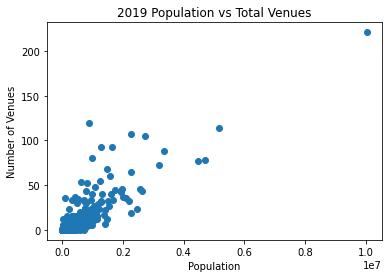

In [47]:
plt.scatter(df_pop_venue.POP_ESTIMATE_2019, df_pop_venue.num_venues)
plt.title('2019 Population vs Total Venues')
plt.xlabel('Population')
plt.ylabel('Number of Venues')

In [50]:
# We should also determine the venues per 10,000
df_pop_venue['VENUE_PER_10K'] = df_pop_venue.num_venues / (df_pop_venue.POP_ESTIMATE_2019/10000)

df_pop_venue.sort_values(by='VENUE_PER_10K', ascending=False)[0:25]
#pop_venue['VENUE_PER_CAPITA'].plot.box()


,state,county,CENSUS_2010_POP,POP_ESTIMATE_2013,POP_ESTIMATE_2014,POP_ESTIMATE_2015,POP_ESTIMATE_2016,POP_ESTIMATE_2017,POP_ESTIMATE_2018,POP_ESTIMATE_2019,N_POP_CHG_2013,N_POP_CHG_2014,N_POP_CHG_2015,N_POP_CHG_2016,N_POP_CHG_2017,N_POP_CHG_2018,N_POP_CHG_2019,Births_2013,Births_2014,Births_2015,Births_2016,Births_2017,Births_2018,Births_2019,Deaths_2013,...,R_NATURAL_INC_2018,R_NATURAL_INC_2019,R_INTERNATIONAL_MIG_2013,R_INTERNATIONAL_MIG_2014,R_INTERNATIONAL_MIG_2015,R_INTERNATIONAL_MIG_2016,R_INTERNATIONAL_MIG_2017,R_INTERNATIONAL_MIG_2018,R_INTERNATIONAL_MIG_2019,R_DOMESTIC_MIG_2013,R_DOMESTIC_MIG_2014,R_DOMESTIC_MIG_2015,R_DOMESTIC_MIG_2016,R_DOMESTIC_MIG_2017,R_DOMESTIC_MIG_2018,R_DOMESTIC_MIG_2019,R_NET_MIG_2013,R_NET_MIG_2014,R_NET_MIG_2015,R_NET_MIG_2016,R_NET_MIG_2017,R_NET_MIG_2018,R_NET_MIG_2019,num_venues,VENUE_PER_10K
2239,Oregon,Wallowa,7008.0,6771.0,6779.0,6813.0,6915.0,7025.0,7058.0,7208.0,-30.0,8.0,34.0,102.0,110.0,33.0,150.0,61.0,71.0,54.0,63.0,69.0,55.0,61.0,91.0,...,-2.840304,-1.401935,0.147362,-0.147601,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.985240,8.681577,17.191142,19.512195,7.384790,22.430955,0.147362,3.837638,8.681577,17.191142,19.512195,7.384790,22.430955,6.0,8.324084
839,Iowa,Jefferson,16843.0,17629.0,17793.0,17906.0,18063.0,18219.0,18256.0,18295.0,351.0,164.0,113.0,157.0,156.0,37.0,39.0,147.0,151.0,171.0,156.0,162.0,147.0,158.0,159.0,...,-0.822481,-1.477388,20.855416,17.220936,12.325275,13.567238,15.048785,7.786155,7.769965,0.171885,-7.001299,-8.515645,-4.559482,-4.134281,-5.044551,-4.049137,21.027301,10.219638,3.809631,9.007757,10.914503,2.741604,3.720828,12.0,6.559169
1766,New Hampshire,Cheshire,77117.0,76712.0,76426.0,76288.0,75975.0,75963.0,75901.0,76085.0,-190.0,-286.0,-138.0,-313.0,-12.0,-62.0,184.0,700.0,626.0,643.0,668.0,669.0,645.0,636.0,700.0,...,-1.830585,-1.079047,0.572864,0.861968,1.479891,1.352922,0.750306,0.671654,0.684274,-3.007538,-4.035576,-2.710950,-4.531633,0.131633,0.408260,2.855526,-2.434674,-3.173608,-1.231059,-3.178711,0.881939,1.079914,3.539800,36.0,4.731550
2864,Virginia,Highland,2321.0,2205.0,2238.0,2196.0,2210.0,2217.0,2208.0,2190.0,-29.0,33.0,-42.0,14.0,7.0,-9.0,-18.0,12.0,19.0,10.0,19.0,23.0,18.0,17.0,23.0,...,-5.423729,-6.366530,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-8.109935,22.057169,-9.923320,7.262823,4.065959,1.355932,-1.819009,-8.109935,22.057169,-9.923320,7.262823,4.065959,1.355932,-1.819009,1.0,4.566210
919,Kansas,Gove,2695.0,2794.0,2748.0,2698.0,2622.0,2622.0,2611.0,2636.0,35.0,-46.0,-50.0,-76.0,0.0,-11.0,25.0,32.0,29.0,44.0,37.0,30.0,33.0,27.0,48.0,...,1.528760,-3.049362,0.720331,0.721761,0.734484,1.127820,0.762777,0.764380,0.762340,17.287952,-13.713461,-20.565553,-28.571429,1.144165,-6.497229,12.578616,18.008284,-12.991700,-19.831069,-27.443609,1.906941,-5.732849,13.340957,1.0,3.793627
2740,Texas,Sutton,4128.0,3982.0,3969.0,3915.0,3886.0,3792.0,3752.0,3776.0,66.0,-13.0,-54.0,-29.0,-94.0,-40.0,24.0,62.0,53.0,44.0,57.0,59.0,43.0,40.0,39.0,...,5.567338,2.656748,1.519372,3.773110,4.058853,5.383925,4.428237,3.711559,3.719447,9.369461,-13.331656,-21.055302,-18.971927,-35.946861,-20.148462,0.265675,10.888833,-9.558546,-16.996448,-13.588002,-31.518625,-16.436903,3.985122,1.0,2.648305
2959,Washington,Columbia,4078.0,4002.0,3985.0,3960.0,3975.0,4002.0,4039.0,3985.0,25.0,-17.0,-25.0,15.0,27.0,37.0,-54.0,34.0,40.0,35.0,37.0,32.0,38.0,38.0,44.0,...,-0.994901,-1.495513,2.255922,4.757731,3.775960,3.528670,4.512975,3.730879,3.738784,6.517107,-6.510580,0.000000,3.024575,9.778112,6.466857,-15.952144,8.773029,-1.752848,3.775960,6.553245,14.291087,10.197737,-12.213360,1.0,2.509410
1628,Montana,Mineral,4223.0,4228.0,4195.0,4192.0,4124.0,4235.0,4307.0,4397.0,100.0,-33.0,-3.0,-68.0,111.0,72.0,90.0,44.0,40.0,43.0,43.0,36.0,39.0,37.0,49.0,...,-0.234137,-4.365809,0.000000,-0.237445,-0.476929,-0.481000,-0.478526,-0.468274,-0.459559,25.131642,-3.086786,2.146179,-12.265512,33.496830,17.560290,25.735294,25.131642,-3.324231,1.669250,-12.746513,33.

Text(0.5, 0, 'Venues Per 10k')

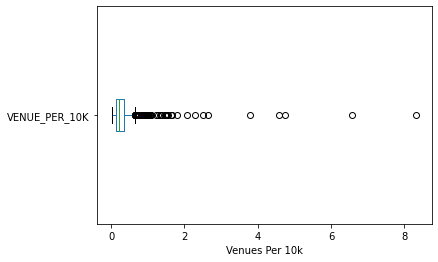

In [67]:
df_pop_venue[df_pop_venue['VENUE_PER_10K']>0]['VENUE_PER_10K'].plot.box(vert=False)
plt.xlabel('Venues Per 10k')

In [63]:
df_pop_venue[df_pop_venue['VENUE_PER_10K']>0]['VENUE_PER_10K'].describe()

count    1039.000000
mean        0.314158
std         0.465135
min         0.020401
25%         0.142754
50%         0.223784
75%         0.340723
max         8.324084
Name: VENUE_PER_10K, dtype: float64

In [29]:
pop_venue.corr()

,CENSUS_2010_POP,POP_ESTIMATE_2013,POP_ESTIMATE_2014,POP_ESTIMATE_2015,POP_ESTIMATE_2016,POP_ESTIMATE_2017,POP_ESTIMATE_2018,POP_ESTIMATE_2019,N_POP_CHG_2013,N_POP_CHG_2014,N_POP_CHG_2015,N_POP_CHG_2016,N_POP_CHG_2017,N_POP_CHG_2018,N_POP_CHG_2019,Births_2013,Births_2014,Births_2015,Births_2016,Births_2017,Births_2018,Births_2019,Deaths_2013,Deaths_2014,Deaths_2015,...,R_NATURAL_INC_2018,R_NATURAL_INC_2019,R_INTERNATIONAL_MIG_2013,R_INTERNATIONAL_MIG_2014,R_INTERNATIONAL_MIG_2015,R_INTERNATIONAL_MIG_2016,R_INTERNATIONAL_MIG_2017,R_INTERNATIONAL_MIG_2018,R_INTERNATIONAL_MIG_2019,R_DOMESTIC_MIG_2013,R_DOMESTIC_MIG_2014,R_DOMESTIC_MIG_2015,R_DOMESTIC_MIG_2016,R_DOMESTIC_MIG_2017,R_DOMESTIC_MIG_2018,R_DOMESTIC_MIG_2019,R_NET_MIG_2013,R_NET_MIG_2014,R_NET_MIG_2015,R_NET_MIG_2016,R_NET_MIG_2017,R_NET_MIG_2018,R_NET_MIG_2019,pop_estimate_avg,num_venues
CENSUS_2010_POP,1.000000,0.999781,0.999596,0.999328,0.998998,0.998643,0.998238,0.997760,0.780958,0.726708,0.679349,0.589063,0.455494,0.251967,0.220506,0.991959,0.991525,0.990687,0.989741,0.989734,0.989520,0.989280,0.980215,0.980162,0.979807,...,0.172060,0.177020,0.287086,0.303023,0.292541,0.269601,0.252392,0.267063,0.251647,0.042002,0.049359,0.037053,0.026214,-0.000437,-0.008382,-0.001725,0.085439,0.100815,0.086788,0.072882,0.035941,0.028410,0.027238,0.999034,0.663029
POP_ESTIMATE_2013,0.999781,1.000000,0.999968,0.999863,0.999687,0.999463,0.999179,0.998825,0.793263,0.739784,0.693001,0.603223,0.469409,0.265869,0.234741,0.993022,0.992781,0.992137,0.991421,0.991490,0.991338,0.991182,0.978442,0.978593,0.978302,...,0.175499,0.180392,0.290416,0.306771,0.296379,0.273137,0.255920,0.270456,0.255094,0.045294,0.052440,0.039995,0.028462,0.001029,-0.006454,0.000135,0.089234,0.104518,0.090379,0.075747,0.037927,0.030814,0.029514,0.999701,0.664107
POP_ESTIMATE_2014,0.999596,0.999968,1.000000,0.999962,0.999851,0.999682,0.999451,0.999151,0.797839,0.745126,0.698592,0.609016,0.475246,0.271936,0.240899,0.993252,0.993098,0.992532,0.991909,0.992010,0.991890,0.991772,0.977823,0.978052,0.977795,...,0.176404,0.181293,0.291127,0.307714,0.297322,0.274041,0.256854,0.271427,0.255944,0.046607,0.054237,0.041511,0.029769,0.001999,-0.005246,0.001265,0.090653,0.106466,0.092054,0.077213,0.039040,0.032162,0.030753,0.999857,0.664280
POP_ESTIMATE_2015,0.999328,0.999863,0.999962,1.000000,0.999961,0.999855,0.999684,0.999444,0.802657,0.750761,0.704791,0.615495,0.481843,0.278787,0.247785,0.993403,0.993339,0.992857,0.992335,0.992477,0.992398,0.992324,0.977121,0.977439,0.977218,...,0.177340,0.182225,0.291853,0.308664,0.298343,0.275013,0.257869,0.272480,0.256841,0.048067,0.056012,0.043515,0.031348,0.003186,-0.003775,0.002641,0.092222,0.108394,0.094230,0.078965,0.040381,0.033785,0.032246,0.999959,0.664471
POP_ESTIMATE_2016,0.998998,0.999687,0.999851,0.999961,1.000000,0.999965,0.999862,0.999689,0.807086,0.756042,0.710653,0.622421,0.489224,0.286489,0.255405,0.993379,0.993401,0.992993,0.992579,0.992778,0.992766,0.992740,0.976578,0.976989,0.976816,...,0.178270,0.183170,0.292671,0.309700,0.299382,0.276127,0.259012,0.273685,0.257781,0.049477,0.057863,0.045410,0.033590,0.004763,-0.001967,0.004300,0.093756,0.110411,0.096300,0.081406,0.042135,0.035768,0.034030,0.999995,0.664671
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
R_NET_MIG_2017,0.035941,0.037927,0.039040,0.040381,0.042135,0.044205,0.046009,0.047725,0.096658,0.122053,0.137750,0.181722,0.236027,0.217620,0.205625,0.026826,0.028169,0.029264,0.031551,0.033448,0.036003,0.037189,0.043668,0.045726,0.048018,...,-0.079912,-0.081618,-0.020233,-0.020782,-0.016658,-0.000694,0.018070,-0.006281,-0.046035,0.204656,0.244398,0.405493,0.503537,0.989721,0.516378,0.460432,0.201493,0.239486,0.402209,0.504740,1.000000,0.517946,0.459783,0.042532,0.036815
R_NET_MIG_2018,0.028410,0.030814,0.032162,0.033785,0.035768,0.037947,0.040444,0.042671,0.107

In [69]:
for column in df_pop_venue.columns:
    print(column)

state
county
CENSUS_2010_POP
POP_ESTIMATE_2013
POP_ESTIMATE_2014
POP_ESTIMATE_2015
POP_ESTIMATE_2016
POP_ESTIMATE_2017
POP_ESTIMATE_2018
POP_ESTIMATE_2019
N_POP_CHG_2013
N_POP_CHG_2014
N_POP_CHG_2015
N_POP_CHG_2016
N_POP_CHG_2017
N_POP_CHG_2018
N_POP_CHG_2019
Births_2013
Births_2014
Births_2015
Births_2016
Births_2017
Births_2018
Births_2019
Deaths_2013
Deaths_2014
Deaths_2015
Deaths_2016
Deaths_2017
Deaths_2018
Deaths_2019
NATURAL_INC_2013
NATURAL_INC_2014
NATURAL_INC_2015
NATURAL_INC_2016
NATURAL_INC_2017
NATURAL_INC_2018
NATURAL_INC_2019
INTERNATIONAL_MIG_2013
INTERNATIONAL_MIG_2014
INTERNATIONAL_MIG_2015
INTERNATIONAL_MIG_2016
INTERNATIONAL_MIG_2017
INTERNATIONAL_MIG_2018
INTERNATIONAL_MIG_2019
DOMESTIC_MIG_2013
DOMESTIC_MIG_2014
DOMESTIC_MIG_2015
DOMESTIC_MIG_2016
DOMESTIC_MIG_2017
DOMESTIC_MIG_2018
DOMESTIC_MIG_2019
NET_MIG_2013
NET_MIG_2014
NET_MIG_2015
NET_MIG_2016
NET_MIG_2017
NET_MIG_2018
NET_MIG_2019
RESIDUAL_2013
RESIDUAL_2014
RESIDUAL_2015
RESIDUAL_2016
RESIDUAL_2017
RESID

In [78]:
df_pop_venue['AVG_BIRTH_RATE'] = ( df_pop_venue.R_birth_2013 + \
df_pop_venue.R_birth_2014 + \
df_pop_venue.R_birth_2015 + \
df_pop_venue.R_birth_2016 + \
df_pop_venue.R_birth_2017 + \
df_pop_venue.R_birth_2018 + \
df_pop_venue.R_birth_2019 ) / 7 \

df_pop_venue['AVG_DEATH_RATE'] = ( df_pop_venue.R_death_2013 + \
df_pop_venue.R_death_2014 + \
df_pop_venue.R_death_2015 + \
df_pop_venue.R_death_2016 + \
df_pop_venue.R_death_2017 + \
df_pop_venue.R_death_2018 + \
df_pop_venue.R_death_2019 ) / 7 \


df_pop_venue['AVG_NATURAL_INC']  = (df_pop_venue.R_NATURAL_INC_2013 + df_pop_venue.R_NATURAL_INC_2014 + df_pop_venue.R_NATURAL_INC_2015 + df_pop_venue.R_NATURAL_INC_2016 + df_pop_venue.R_NATURAL_INC_2017 + df_pop_venue.R_NATURAL_INC_2018 + df_pop_venue.R_NATURAL_INC_2019 ) / 7

df_pop_venue['AVG_INTL_MIG'] = (df_pop_venue.R_INTERNATIONAL_MIG_2013 + df_pop_venue.R_INTERNATIONAL_MIG_2014 + df_pop_venue.R_INTERNATIONAL_MIG_2015 + df_pop_venue.R_INTERNATIONAL_MIG_2016 + df_pop_venue.R_INTERNATIONAL_MIG_2017 + df_pop_venue.R_INTERNATIONAL_MIG_2018 + df_pop_venue.R_INTERNATIONAL_MIG_2019) / 7

df_pop_venue['AVG_DOMESTIC_MIG'] = (df_pop_venue.R_DOMESTIC_MIG_2013 + df_pop_venue.R_DOMESTIC_MIG_2014 + df_pop_venue.R_DOMESTIC_MIG_2015 + df_pop_venue.R_DOMESTIC_MIG_2016 + df_pop_venue.R_DOMESTIC_MIG_2017 + df_pop_venue.R_DOMESTIC_MIG_2018 + df_pop_venue.R_DOMESTIC_MIG_2019) / 7 


df_pop_venue['AVG_NET_MIG'] = ( df_pop_venue.R_NET_MIG_2013 + df_pop_venue.R_NET_MIG_2014 + df_pop_venue.R_NET_MIG_2015 + df_pop_venue.R_NET_MIG_2016 + df_pop_venue.R_NET_MIG_2017 + df_pop_venue.R_NET_MIG_2018 + df_pop_venue.R_NET_MIG_2019) / 7



In [86]:
df_avg_venue = df_pop_venue[['state','county','num_venues','AVG_BIRTH_RATE','AVG_DEATH_RATE','AVG_NATURAL_INC','AVG_INTL_MIG','AVG_DOMESTIC_MIG','AVG_NET_MIG']]

corr = df_avg_venue.corr()
corr.style.background_gradient(cmap='coolwarm')

,num_venues,AVG_BIRTH_RATE,AVG_DEATH_RATE,AVG_NATURAL_INC,AVG_INTL_MIG,AVG_DOMESTIC_MIG,AVG_NET_MIG
num_venues,1.000000,0.058454,-0.229855,0.185375,0.297976,0.039728,0.101032
AVG_BIRTH_RATE,0.058454,1.000000,-0.257376,0.776915,0.141166,-0.246740,-0.220057
AVG_DEATH_RATE,-0.229855,-0.257376,1.000000,-0.808354,-0.413815,-0.087085,-0.172505
AVG_NATURAL_INC,0.185375,0.776915,-0.808354,1.000000,0.355625,-0.093579,-0.021667
AVG_INTL_MIG,0.297976,0.141166,-0.413815,0.355625,1.000000,-0.144629,0.058637
AVG_DOMESTIC_MIG,0.039728,-0.246740,-0.087085,-0.093579,-0.144629,1.000000,0.979303
AVG_NET_MIG,0.101032,-0.220057,-0.172505,-0.021667,0.058637,0.979303,1.000000


Text(0, 0.5, 'Number of Venues')

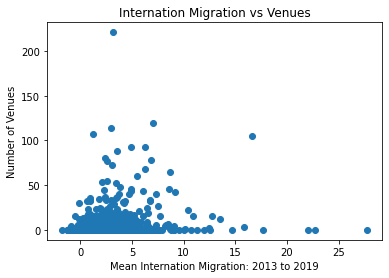

In [87]:
plt.scatter(df_avg_venue.AVG_INTL_MIG, df_avg_venue.num_venues)
plt.title('Internation Migration vs Venues')
plt.xlabel('Mean Internation Migration: 2013 to 2019')
plt.ylabel('Number of Venues')

In [94]:
df_avg_venue[df_avg_venue.num_venues>50].sort_values(by='AVG_INTL_MIG',ascending=False)

,state,county,num_venues,AVG_BIRTH_RATE,AVG_DEATH_RATE,AVG_NATURAL_INC,AVG_INTL_MIG,AVG_DOMESTIC_MIG,AVG_NET_MIG
362,Florida,Miami-Dade,105.0,11.866462,7.461375,4.405087,16.605504,-13.485505,3.119999
2969,Washington,King,65.0,11.851540,6.065584,5.785955,8.713423,1.692131,10.405554
223,California,San Francisco,120.0,10.417515,6.756551,3.660965,7.037634,-1.910946,5.126688
2623,Texas,Harris,78.0,15.369866,5.676707,9.693159,6.858980,-2.216572,4.642408
1858,New York,New York,93.0,10.928446,6.444012,4.484433,6.256064,-10.286350,-4.030286
347,Florida,Hillsborough,68.0,12.429113,7.647519,4.781595,6.224356,8.918802,15.143158
2294,Pennsylvania,Philadelphia,60.0,13.994825,9.197470,4.797354,5.478148,-7.287523,-1.809375
2749,Texas,Travis,93.0,13.294395,4.621302,8.673093,4.866728,7.681698,12.548427
222,California,San Diego,88.0,13.049245,6.507534,6.541711,3.571040,-2.837214,0.733827
2233,Oregon,Multnomah,53.0,11.358303,7.274649,4.083654,3.442209,1.992147,5.434355
